# **Prediksi Harga Rumah di King County, USA**
data: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

source of code example: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Modeling%20House%20Price%20with%20Regularized%20Linear%20Model%20&%20Xgboost.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Exploration**

In [10]:
#read data

house_data = pd.read_csv('/content/drive/My Drive/My Mini Projects/Kaggle - House/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
#atribut data

house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
#drop id dan date karena tampak tidak berpengaruh untuk menentukan prediksi harga rumah

house_data.drop(['id','date'], axis=1, inplace=True)

In [13]:
#ukuran dataframe

house_data.shape

(21613, 19)

In [14]:
#cek missing value

house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
#statistic summary

house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


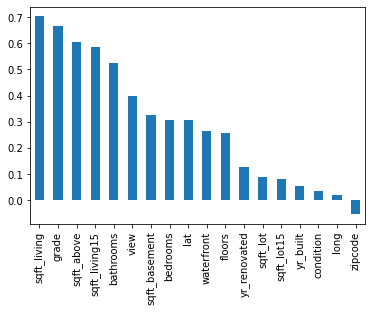

<Figure size 1008x432 with 0 Axes>

In [16]:
#korelasi atribut lainnya dengan atribut 'price' (karena kita ingin bagaimana faktor lain mempengaruhi harga suatu rumah)

corr_with_price = house_data.corr()['price'].sort_values(ascending=False)
corr_with_price.drop('price').plot.bar()
plt.figure(figsize=(14,6))
plt.show()

#korelasi tertinggi sqft_living

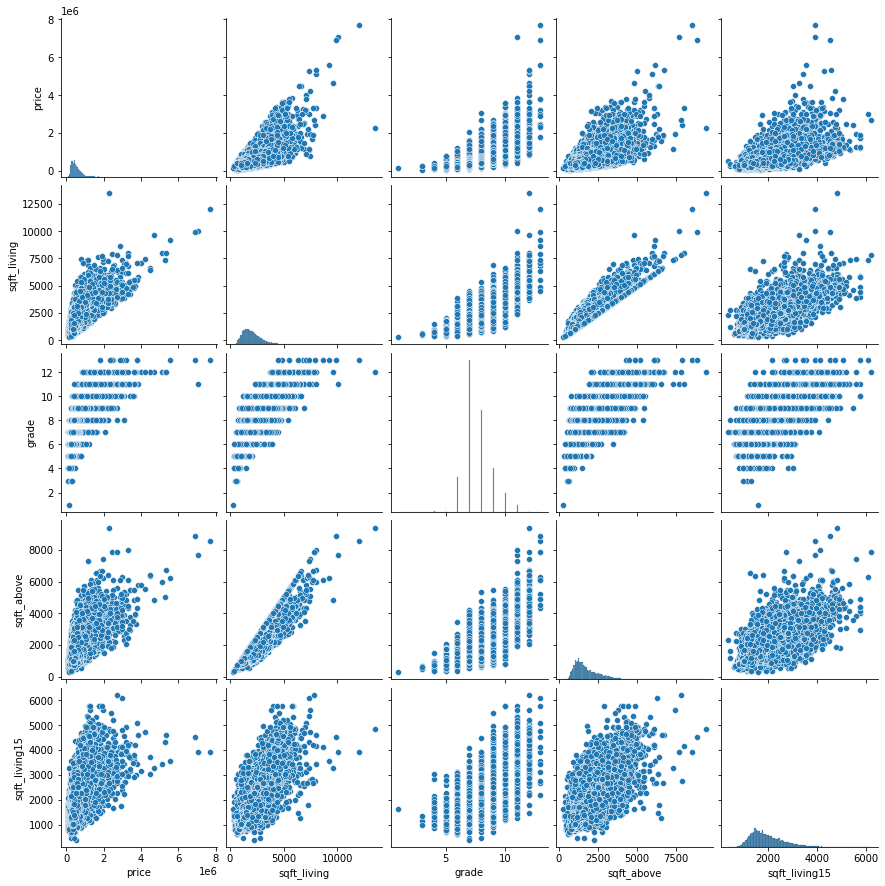

In [19]:
#menampilkan bagaimana hubungan korelasi antara atribut dengan price itu terjadi
#yang dilihat adalah atribut-atribut dengan nilai korelasi tinggi, yaitu sqft_living, grade, sqft_above, sqft_living15

sns.pairplot(house_data[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
plt.show()

## **Build Model**

In [27]:
#menentukan fitur pembelajaran dan label

X = house_data.drop(['price'],axis=1)
Y = house_data['price']

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 2)
X = poly.fit_transform(X)

In [30]:
#splitting data train dan test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=4)

### **Polynomial Ridge Regression**

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 50000)
ridge.fit(x_train,y_train)

Ridge(alpha=50000)

In [32]:
#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = ridge.predict(x_test)
y_train_pred = ridge.predict(x_train)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_pred)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

print(r2_train, r2_test)
print(rmse_train, rmse_test)

0.7006872104267556 0.6920838125408939
201858.72873301103 199563.62677680512
